In [39]:
#from lib2to3.pytree import convert
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tinymlgen import port
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil
import cv2
import matplotlib.pyplot as plt
import math
from PIL import Image

In [40]:
x = np.load('C:\\Users\\poori\\x_low_gray.npy')
y = np.load('C:\\Users\\poori\\y_low_gray.npy')
print(np.shape(x))
print(np.shape(y))
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
decoded_y = label_encoder.inverse_transform(encoded_y)
result_y_Dict = dict(zip(encoded_y, decoded_y))

(1916, 28, 28)
(1916,)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.2, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=4)
print("size of x_train is ", np.shape(x_train))
print("size of x_test is ", np.shape(x_test))


size of x_train is  (1149, 28, 28)
size of x_test is  (384, 28, 28)


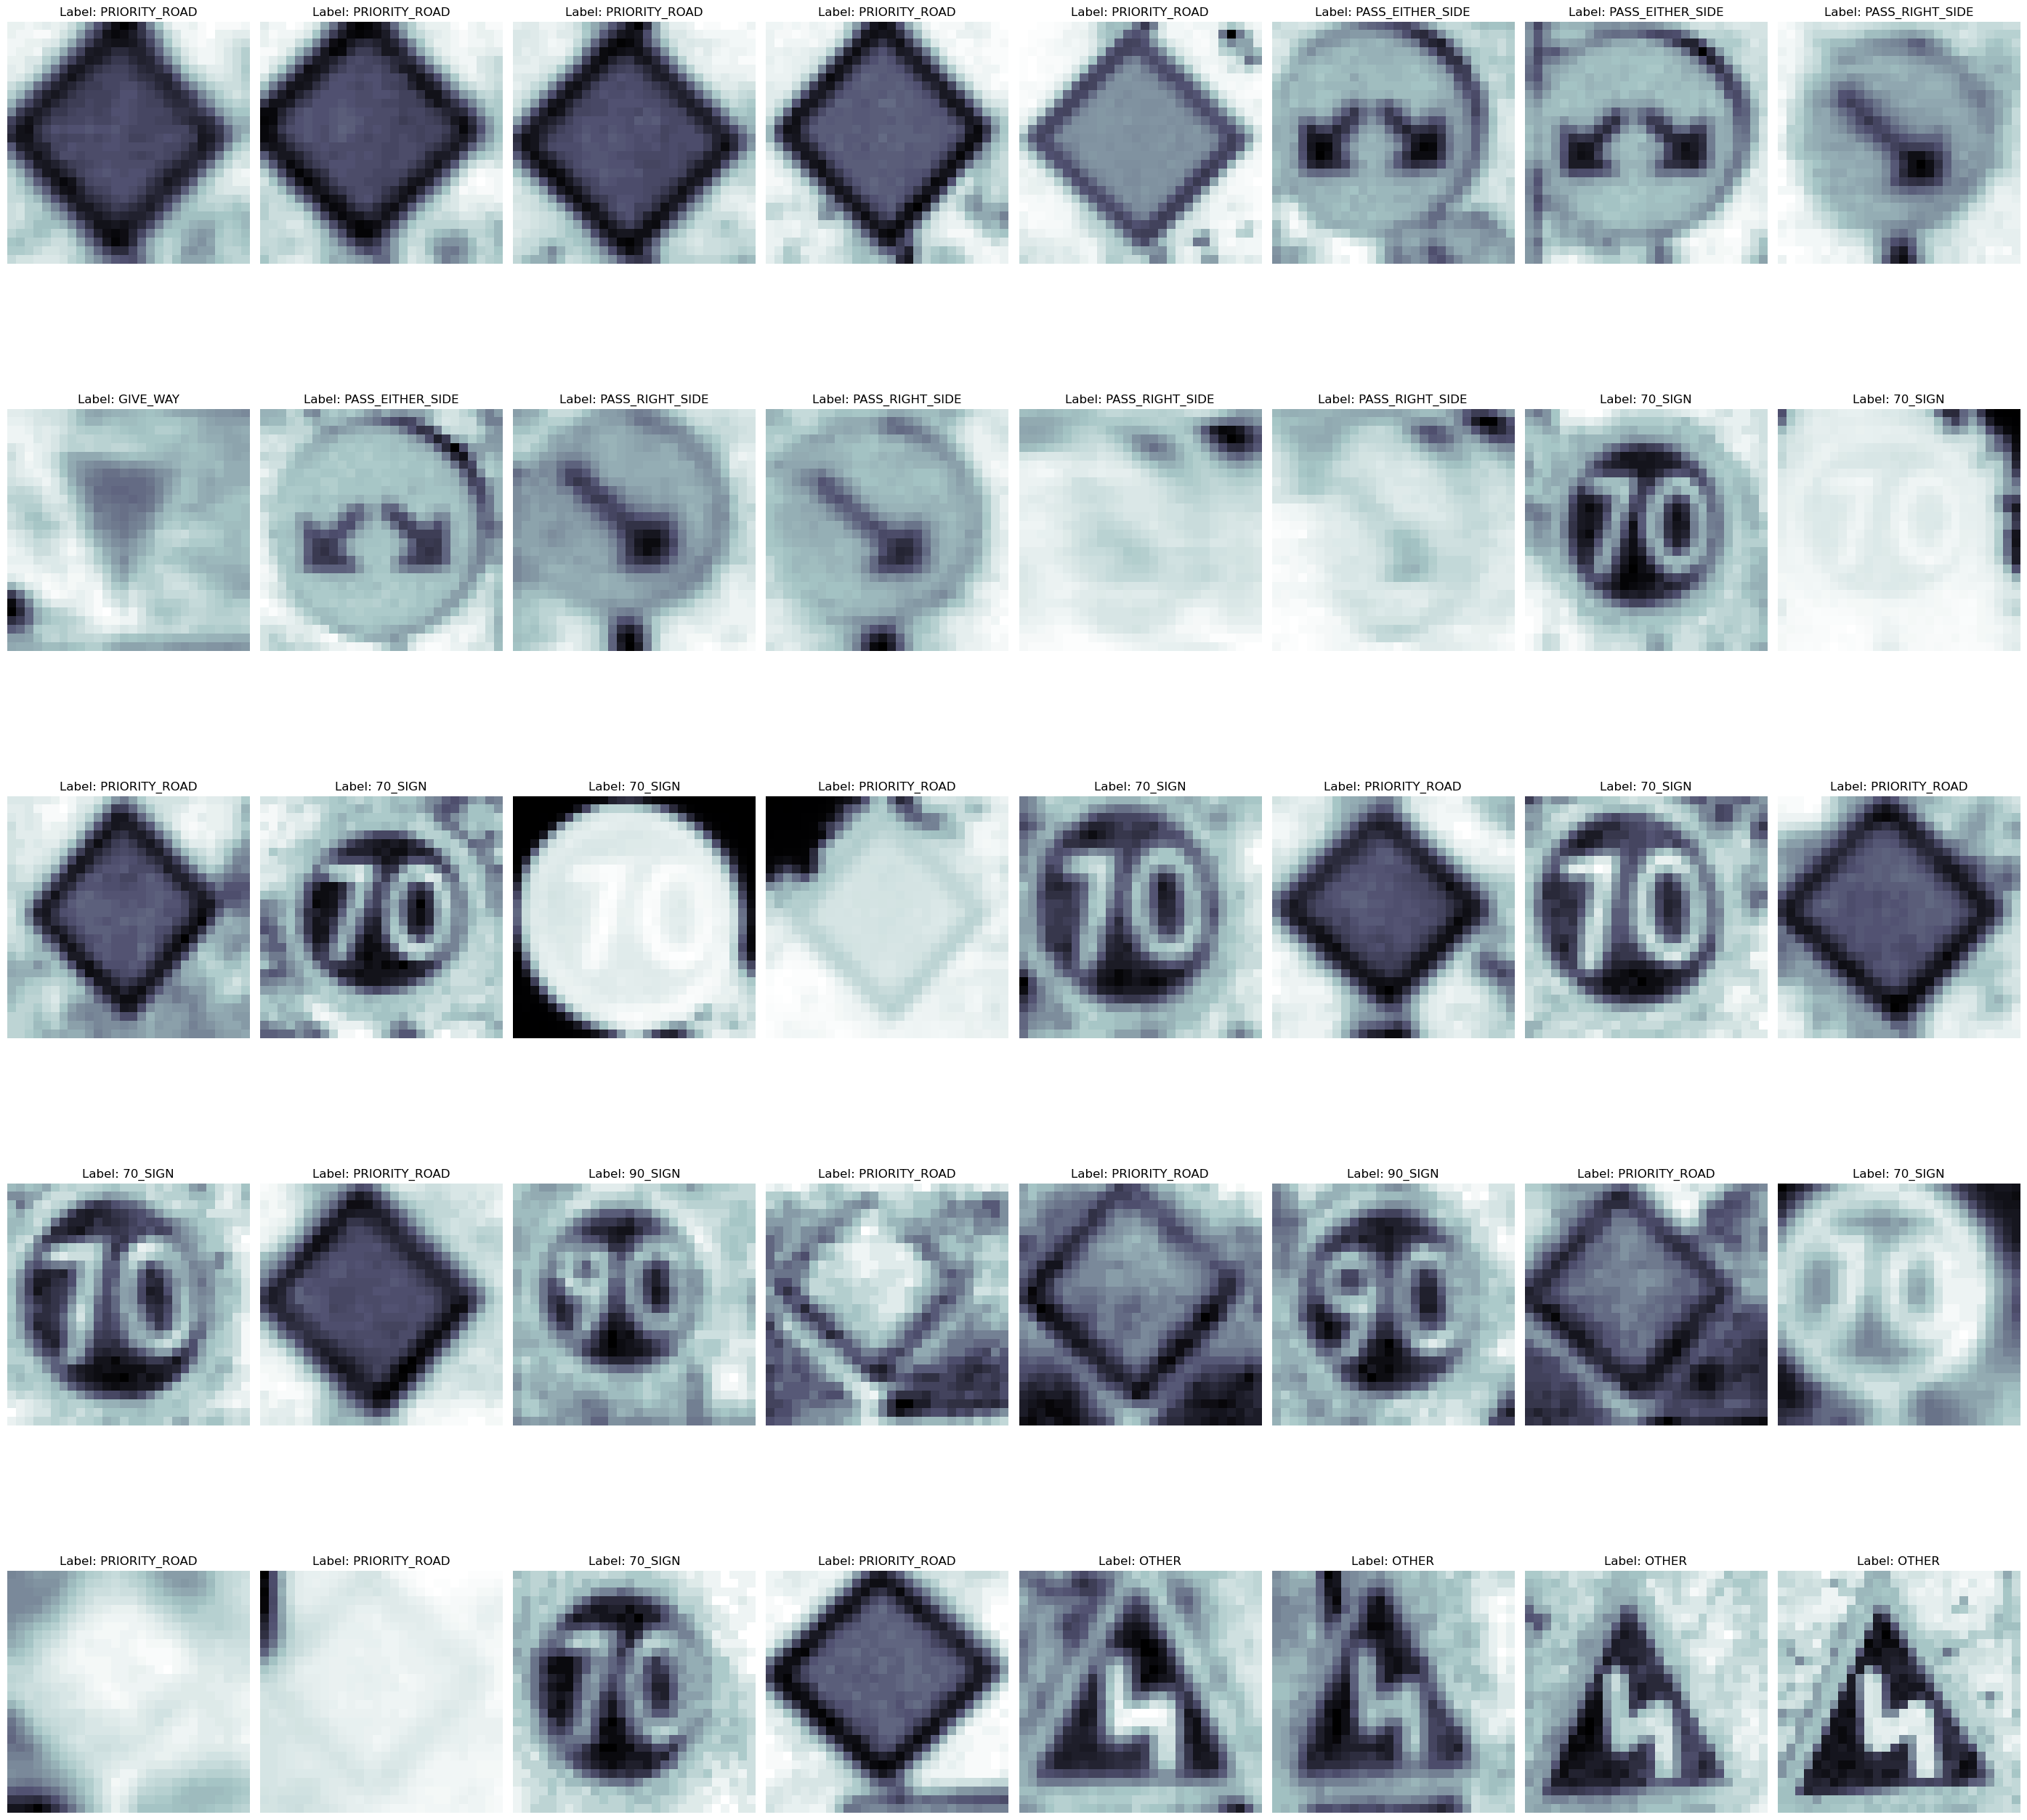

In [43]:

# Display images in subplots
num_rows = 5
num_cols = 8
total_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 28))

for i in range(total_images):
    if i < len(x):
        image = x[i]
        label = y[i]
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image, cmap='bone_r') 
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    else:
        axes[i // num_cols, i % num_cols].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()


In [44]:
# dataset reshape
x_train = x_train.reshape((-1, x_train.shape[1], x_train.shape[2], 1))
print("Now, size of x_train is ", np.shape(x_train))

x_test = x_test.reshape((-1, x_test.shape[1], x_test.shape[2], 1))
print("Now, size of x_test is ", np.shape(x_test))

x_val = x_val.reshape((-1, x_val.shape[1], x_val.shape[2], 1))
print("Now, size of x_train is ", np.shape(x_val))




Now, size of x_train is  (1149, 28, 28, 1)
Now, size of x_test is  (384, 28, 28, 1)
Now, size of x_train is  (383, 28, 28, 1)
to be used as train labels in data.h [ 7  6 15  7 12 14 12 17 15  8 17 16  6 15  9 18  6 15 16  6  9  6 12  4
 15 16 17 17  2  7 12  4 12 17 12 16 16 15 10 16 17 16  6  3  9 12 16  9
 12  4  0 11  4 12 12 12 16 16 17 16 15 12 15  4 15 16 16  1 14 15 12 16
  5 17 15  2  4 17  8 10 12 17  6 12 16  9 16 12  4 17]
to be used as Validation labels in data.h [ 6 16  1 12  9  9 16 15 12 17 17  7 15  1 12  0  5 15  8  8  6 17 12 12
  6 17]


In [68]:
model = Sequential([
    Conv2D(2, (2,2), activation='relu', input_shape=x_train.shape[1:]),
    MaxPool2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(300, activation='relu', name = 'dense_1'),
    Dense(20, activation='softmax', name = 'dense_2') # probability
])

# text Description of model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 2)         10        
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 2)         0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 2)         0         
                                                                 
 flatten_10 (Flatten)        (None, 338)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               101700    
                                                                 
 dense_2 (Dense)             (None, 20)                6020      
                                                     

In [69]:
# define loss function and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=10, verbose=2)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Epoch 1/20
115/115 - 2s - loss: 2.9151 - accuracy: 0.2167 - val_loss: 2.6671 - val_accuracy: 0.2167 - 2s/epoch - 13ms/step
Epoch 2/20
115/115 - 1s - loss: 2.3644 - accuracy: 0.2872 - val_loss: 2.5436 - val_accuracy: 0.2689 - 560ms/epoch - 5ms/step
Epoch 3/20
115/115 - 1s - loss: 2.0629 - accuracy: 0.3603 - val_loss: 2.4505 - val_accuracy: 0.3159 - 799ms/epoch - 7ms/step
Epoch 4/20
115/115 - 1s - loss: 1.8856 - accuracy: 0.4326 - val_loss: 2.3383 - val_accuracy: 0.3316 - 718ms/epoch - 6ms/step
Epoch 5/20
115/115 - 1s - loss: 1.7257 - accuracy: 0.4621 - val_loss: 2.2837 - val_accuracy: 0.4439 - 656ms/epoch - 6ms/step
Epoch 6/20
115/115 - 1s - loss: 1.6170 - accuracy: 0.5283 - val_loss: 2.2443 - val_accuracy: 0.5013 - 800ms/epoch - 7ms/step
Epoch 7/20
115/115 - 1s - loss: 1.5037 - accuracy: 0.5718 - val_loss: 2.0090 - val_accuracy: 0.5222 - 682ms/epoch - 6ms/step
Epoch 8/20
115/115 - 1s - loss: 1.3103 - accuracy: 0.6066 - val_loss: 1.9484 - val_accuracy: 0.5170 - 594ms/epoch - 5ms/step
Ep

17
Predicted label: PRIORITY_ROAD


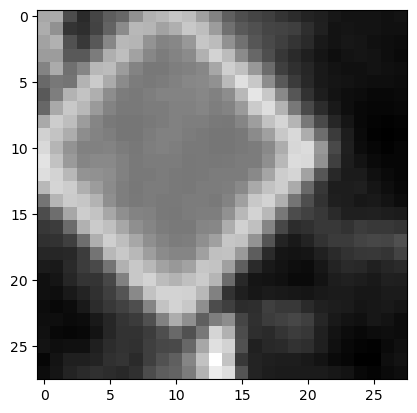

In [70]:
# input an image from x_val to test if the model works fine
image_index = 73
plt.imshow(np.squeeze(x_val[image_index]), cmap='gray')
# make a prediction
yhat = model.predict([np.expand_dims(x_val[image_index], axis=0)], verbose = 0)
result = np.argmax(yhat)
print(result)
value = result_y_Dict.get(result)
print('Predicted label: {}'.format(value))

1/1 [==============================] - 0s 22ms/step
16
Predicted label: PEDESTRIAN_CROSSING


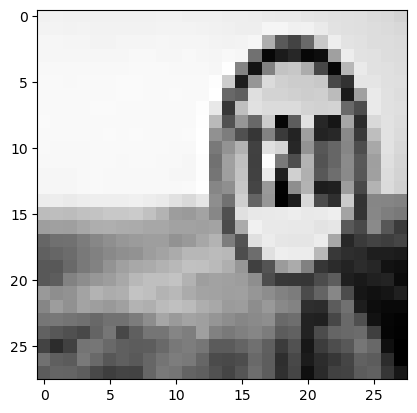

In [75]:
# to test the model with a random image from the internet
image = Image.open('C:\\Users\\poori\\OneDrive\\Desktop\\1202.jpg')
input_shape = (28, 28)
image = image.resize(input_shape)  # Resize the image to match the model's input size
grayscale_image = image.convert('L')
input_data = tf.keras.preprocessing.image.img_to_array(grayscale_image)
input_data = tf.expand_dims(input_data, axis=0)
#input_data = tf.keras.applications.mobilenet.preprocess_input(input_data)  # Preprocess according to your model

yhat = model.predict(input_data)
result = np.argmax(yhat)
print(result)
value = result_y_Dict.get(result)
print('Predicted label: {}'.format(value))
plt.imshow(grayscale_image, cmap='gray')


In [76]:
c_code = port(model, variable_name='road_sign_detection', pretty_print=True,optimize=False)
filename = 'road.h'
with open(filename,'w') as f: 
    f.write(c_code)

INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpgnlt6n69\assets


INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpgnlt6n69\assets


In [78]:
#Lite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('./modellite.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpxk1y_vv0\assets


INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpxk1y_vv0\assets


111664